# MACHINE LEARNING - LOAN PREDICTION

IMPORT LIBRARIES 

In [681]:
#IMPORT LIBRARIES 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn import preprocessing

# LOADING DATA

In [682]:
#LOADING DATA
df = pd.read_csv('loan_test.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [683]:
df.shape    #what is in dataset

(54, 10)

# Convert to date time object 

In [684]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


# Data visualization and pre-processing

Let’s see how many of each class is in our data set 

In [685]:
df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


In [686]:
#by installing conda all packages are there for visualisation like seaborn as well 

In [687]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



# GENDER VS PRINCIPAL

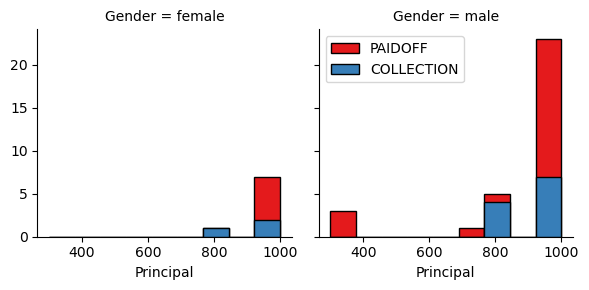

In [688]:
import matplotlib.pyplot as plt
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



# GENDER VS AGE 

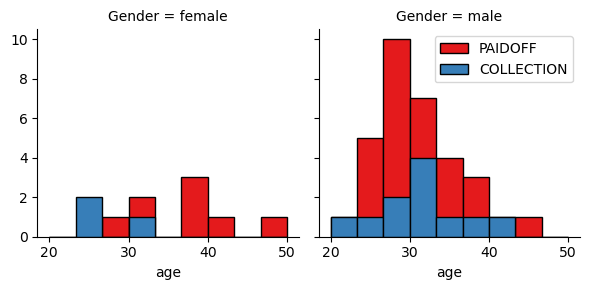

In [689]:
import matplotlib as mp
import matplotlib.pyplot as plt
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


# Pre-processing: Feature selection/extraction

In [690]:
#day of the week when people get loan 

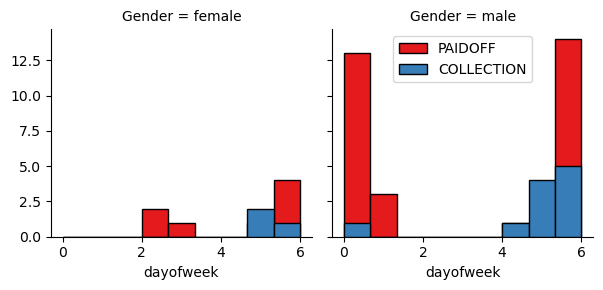

In [691]:
import matplotlib.pyplot as plt
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

# We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [692]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


# Convert Categorical features to numerical values

In [693]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

# Lets convert male to 0 and female to 1:


In [694]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)  #replace with what 
df.head()  #print out, show the table

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


# GROUP BY EDUCATION 

In [695]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

# Feature before One Hot Encoding

In [696]:
df[['Principal','terms','age','Gender','education']].head()     #PUT OUR DATA INTO DATAFRAME WITH ONLY THESE PARAMETERS 

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [697]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


# FEATURE SELECTION 

In [698]:
#DEFINE X
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [699]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# NORMALIZE DATA 

In [700]:
X= preprocessing.StandardScaler().fit(X).transform(X)   #normalize data so we can later work with that because they are binary(numbers)
X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

# CLASSIFICATION 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Linear Regression


# SPLIT DATA

In [701]:
x_train, x_test, y_train, y_test = train_test_split(Feature, y, test_size=.2, random_state=10)    

# K Nearest Neighbor(KNN)

In [702]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (43, 8) (43,)
Test set: (11, 8) (11,)


Modeling

In [703]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

PREDICTIONS

In [704]:
predictions = KNN_model.predict(x_test)
predictions[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

WHAT IS THE BEST K????? 

In [705]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.72727273, 0.63636364, 0.81818182, 0.63636364, 0.81818182,
       0.54545455, 0.81818182, 0.72727273, 0.81818182, 0.81818182,
       0.81818182, 0.81818182, 1.        , 0.90909091])

Building the model again, using k=7

In [706]:
# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

In [707]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
knn_predictions = kNN_model.predict(X_test)

#model select k=7   MODEL ACCURACY
KNN_model = KNeighborsClassifier(n_neighbors = 7)
KNN_model.fit(X_train, y_train)

#performance
X_train ,X_test , y_train, y_test
predictions = KNN_model.predict(X_test)
predictions[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [708]:
KNN_Accuracy_Score = metrics.accuracy_score(predictions, y_test)

In [709]:
accuracy1 = metrics.accuracy_score(y_train, KNN_model.predict(X_train))  
#accuracy for train_X
print('Training acc: %.3f' % accuracy1)
accuracy2 = metrics.accuracy_score(y_test, KNN_model.predict(X_test))   
#accuracy for test_X
print('Testing acc: %.3f' % accuracy2)

Training acc: 0.860
Testing acc: 0.818


In [710]:
f1_KNN = f1_score(np.array(df['loan_status']), np.array(KNN_model.predict(Feature)), pos_label = 'PAIDOFF')
print("KNN F1 score : ", f1_KNN)
KNN_acc = np.mean(KNN_model.predict(Feature) ==df['loan_status'])
print("KNN Accuracy Score: ",KNN_acc)
jaccard_KNN = jaccard_score(np.array(df['loan_status']), np.array(KNN_model.predict(Feature)), pos_label ='PAIDOFF')
print("KNN Jaccard Score: ",jaccard_KNN)

KNN F1 score :  0.851063829787234
KNN Accuracy Score:  0.7407407407407407
KNN Jaccard Score:  0.7407407407407407


# DECISSION  TREE 

FIT THE DATA 

In [711]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

PREDICTION

In [712]:
predictions = Tree.predict(x_test)
predictions

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF'], dtype=object)

CALCULATION OF JACCARD_SCORE, F1, ACCURACY_SCORE

In [713]:
DT_yhat = Tree.predict(X_test)


print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )
#Tree_Accuracy_Score = metrics.accuracy_score(predictions, y_test)
print("Tree Accuracy Score:",Tree_Accuracy_Score)
jaccard_DT = jaccard_score(np.array(df['loan_status']), np.array(Tree.predict(Feature)), pos_label ='PAIDOFF')
print("Jacart Score is:", jaccard_DT)

DT F1-score: 0.87
Tree Accuracy Score: 0.8181818181818182
Jacart Score is: 0.56


In [714]:
f1_DDT = f1_score(np.array(df['loan_status']), np.array(Tree.predict(Feature)), pos_label = 'PAIDOFF')
print("KNN F1 score : ", f1_DDT)  #------------------------oprava

KNN F1 score :  0.717948717948718


# LOGISTIC REGRESSION 

SPLIT THE DATA 

In [715]:
x_train, x_test, y_train, y_test = train_test_split(Feature, y, test_size=.2, random_state=1)

In [716]:
from sklearn.linear_model import LogisticRegression   #fit model with data
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [717]:
predictions = LR_model.predict(x_test)  #prediction on testing data
predictions

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION'], dtype=object)


MODEL EVALUATION 

In [718]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [719]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
print("LR Accuracy Score", LR_Accuracy_Score)
#print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))
LRLOGLOS=log_loss
logic_jac = jaccard_score(np.array(df['loan_status']), np.array(LR_model.predict(Feature)), pos_label ='PAIDOFF')
print("Jacard Score for SVM IS:", logic_jac)

LR Accuracy Score 0.45454545454545453
LR F1-score: 0.49
LR LogLoss: 0.70
Jacard Score for SVM IS: 0.25


In [720]:
f1_LOG = f1_score(np.array(df['loan_status']), np.array(LR_model.predict(Feature)), pos_label = 'PAIDOFF')
print("KNN F1 score : ", f1_LOG)  #------------------------oprava

KNN F1 score :  0.4


CALCULATIN LOGLOSS 

In [721]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogReg

LogisticRegression(C=0.01, solver='liblinear')

In [722]:
LogReg_yhat = LogReg.predict(X_test)
LogReg_yhat[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [723]:
LogReg_yhat_prob = LogReg.predict_proba(X_test)
LogReg_yhat_prob[0:5]

array([[0.50093367, 0.49906633],
       [0.45632641, 0.54367359],
       [0.47640755, 0.52359245],
       [0.47310966, 0.52689034],
       [0.49367682, 0.50632318]])

In [724]:
from sklearn.metrics import log_loss
LR_log = log_loss(y_test, LogReg_yhat_prob)
print("LogLos for Logistic Regression is:",LR_log)

LogLos for Logistic Regression is: 0.6962288221961912


# SVM - Support Vector Machine

In [725]:
from sklearn import svm   #import library, fit model with data
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC()

In [726]:
predictions = SVM_model.predict(x_test)
predictions

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [727]:
#calculacion of accuracy   #train_X , test_X , train_y , test_y
accuracy1 = metrics.accuracy_score(y_train, SVM_model.predict(x_train))
print('Training acc: %.2f' % accuracy1)

accuracy2 = metrics.accuracy_score(y_test, SVM_model.predict(X_test))
print('Testing acc: %.2f' % accuracy2)

Training acc: 0.77
Testing acc: 0.64


In [728]:
predictions = SVM_model.predict(x_test)
predictions[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [729]:
#evaluation The highest possible value of an F-score is 1.0, indicating perfect precision and recall,
#and the lowest possible value is 0, if both precision and recall are zero.
#from sklearn.metrics import f1_score
SVM_yhat = SVM_model.predict(X_test)
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )
SVM_Accuracy_Score = metrics.accuracy_score(predictions, y_test)
print("SVM Accuracy Score is:",SVM_Accuracy_Score)
jaccard_svm = jaccard_score(np.array(df['loan_status']), np.array(SVM_model.predict(Feature)), pos_label ='PAIDOFF')
print("Jacard Score for SVM IS:", jaccard_svm)

SVM F1-score: 0.49
SVM Accuracy Score is: 0.6363636363636364
Jacard Score for SVM IS: 0.7407407407407407


In [730]:
f1_SVM = f1_score(np.array(df['loan_status']), np.array(SVM_model.predict(Feature)), pos_label = 'PAIDOFF')
print("SVM F1 score : ", f1_SVM)  #------------------------oprava

SVM F1 score :  0.851063829787234


# LINEAR REGRESSION 

SPLIT DATA 

In [803]:
x_train, x_test, y_train, y_test = train_test_split(Feature,y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)  #split the data 

Train set: (43, 8) (43,)
Test set: (11, 8) (11,)


IMPORT LIBRARY 

In [804]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

PREDICTION 

In [805]:
predictions = LinearReg.predict(x_test)

CALCULATION OF MAE, MSE, R2

In [806]:
LinearRegression_MAE = metrics.mean_absolute_error(predictions, y_test)
LinearRegression_MSE = metrics.mean_squared_error(predictions, y_test)
LinearRegression_R2 = metrics.r2_score(predictions, y_test)

PRINT RESULTS/SHOW RESULTS 

In [807]:
#print results 
print("LR. MAE is:", LinearRegression_MAE)
print("LR. MSE is:",LinearRegression_MSE)
print("LR. R2 is:",LinearRegression_R2)

LR. MAE is: 0.33518390695045164
LR. MSE is: 0.12003270153103007
LR. R2 is: -6.4669488476691575


In [818]:
x_train, x_test, y_train, y_test = train_test_split(Feature,y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)  #split the data 

Train set: (43, 8) (43,)
Test set: (11, 8) (11,)


In [836]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [823]:
LinearReg = LinearRegression().fit(x_train,y_train)

In [831]:
predictions = LinearReg.predict(x_test)

In [827]:
SEED = 42

In [860]:
from sklearn.metrics import f1_score
LRR_yhat = LinearReg.predict(x_test)
print("LinearRegression F1-score: %.2f" % f1_score(y_test, LRR_yhat, average='weighted') )
LIN_Accuracy_Score = metrics.accuracy_score(predictions, y_test)
print("LinearRegression Accuracy Score is:",LIN_Accuracy_Score)
jaccard_LIN = jaccard_score(np.array(df['loan_status']), np.array(LinearReg.predict(Feature)), pos_label ='PAIDOFF')
print("LinearRegression Jaccard score is:", jaccard_LIN)

ValueError: Found input variables with inconsistent numbers of samples: [54, 11]

In [861]:
#f1_LIN = f1_score(np.array(df['loan_status']), np.array(LR_model.predict(Feature)), pos_label = 'PAIDOFF')
print("LIN.Regression F1 score : ", f1_LIN)  #------------------------oprava

LIN.Regression F1 score :  0.4


This part is here in case I will need to update final table with Linear Regression

In [862]:
LIN_Accuracy_Score

0.09090909090909091

In [850]:
jaccard_LIN

0.25

In [851]:
string = "collection"
if string.isnumeric():
    number = float(string)
    print(number)
    
else:
    print("The string is not a valid number")
        

The string is not a valid number


In [859]:
print("Lin accuracy score is:", LIN_Accuracy_Score)
print("jaccard_similarity_score is:", jaccard_LIN)
print("F1 score is:", f1_LIN)

Lin accuracy score is: 0.09090909090909091
jaccard_similarity_score is: 0.25
F1 score is: 0.4


# Convert collection, paidoff into numerical values 

In [852]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)  #replace with what 
df.head()  #print out, show the table

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


# LOAD TEST SET FOR EVALUATION 

In [756]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


-----------------------------------------------------------------------------------------------------------------------------

# Review Part

In [757]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)

logreg.fit(X, y)

LogisticRegression(random_state=16)

In [758]:
logreg_y_pred = logreg.predict(X_test)

In [759]:
ja_list = [jaccard_KNN, jaccard_DT, jaccard_svm, logic_svm]
f1_list = [f1_KNN, f1_DDT, f1_SVM, LR_log]
log_list = ['NA','NA','NA',LR_log]

accuracyReport = pd.DataFrame(ja_list, index=['KNN','Decision Tree','SVM','LogisticRegression'])
accuracyReport.columns = ['Jaccard']
accuracyReport.insert(loc=1, column='F1-score',value=f1_list)
accuracyReport.insert(loc=2, column='LogLoss',value=log_list)
accuracyReport.columns.name = 'Algorithm'
accuracyReport



Algorithm,Jaccard,F1-score,LogLoss
KNN,0.740741,0.851064,NA
Decision Tree,0.560000,0.717949,NA
SVM,0.740741,0.851064,NA
LogisticRegression,0.250000,0.696229,0.696229


In [864]:
print("Linear regression. MAE is:", LinearRegression_MAE)
print("Linear regression. MSE is:",LinearRegression_MSE)
print("Linear regression. R2 is:",LinearRegression_R2)

Linear regression. MAE is: 0.33518390695045164
Linear regression. MSE is: 0.12003270153103007
Linear regression. R2 is: -6.4669488476691575


In [865]:
print("Linear regression accuracy score is:", LIN_Accuracy_Score)
print("Linear regression jaccard_similarity_score is:", jaccard_LIN)
print("Linear regression F1 score is:", f1_LIN)

Linear regression accuracy score is: 0.09090909090909091
Linear regression jaccard_similarity_score is: 0.25
Linear regression F1 score is: 0.4
